In [44]:
library(tidymodels)
library(tidyverse)

data <- read_csv("knowledge_data.csv", show_col_types = FALSE)

New names:
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`


# Group proposal of knowledge level prediction based on user's study time and exam performance


# Introduction:
Involvement in competitive sports is associated with a risk of experiencing a sport-specific injury and its prevalence has been affecting athletes, coaches, therapists, and sport organizers (Lemoyne, 2017). Although there are many health and psychological benefits in participating in physical activities, there is growing concern regarding player safety and injury prevention in competitive sport settings (Maffulli, 2011). This project uses a synthetic dataset designed for injury prediction to explore the relationship between different variables and whether or not future injury is predicted. The dataset includes variables such as player demographics (age, weight, and height), training intensities, recovery times, and previous injury histories to establish a correlation to the possibility of injury in the future. The dataset does not provide information on the type of injury, but rather the “yes” or “no” possibility of athletes experiencing a sport-specific injury according to player attributes and features. In our project, we aim to address the question: ‘Can we predict whether or not a player will experience an injury based on their weight and training intensity?’ using the dataset described.


# Preliminary exploratory data analysis:
For the preliminary data analysis, we will select the columns STG (the degree of study time for goal object materials) and PEG (exam performance of the user for goal objects) as predictors. We will also create a summary table of the knowledge level to ensure that the predicted level quantities are at a similar amount for balanced classification data. Additionally, data points with missing values will be removed.

set.seed(22)

tidy_data_all <- data|>
    select(STG, SCG, STR, LPR, PEG, UNS) |>
    na.omit()

tidy_data <- tidy_data_all |>
    select(STG, PEG, UNS) |>
    filter(UNS!="very_low")

knowledge_split <- initial_split(tidy_data, prop = 0.75, strata = UNS)
knowledge_train <- training(knowledge_split)
knowledge_test <- testing(knowledge_split)

In [73]:
knowledge_prediction_summary <- knowledge_train |>
    group_by(UNS) |>
    summarize(count = n())

mean_table <- knowledge_train |>
    select(STG, PEG) |>
    map_df(mean)

mean_table
knowledge_prediction_summary 

STG,PEG
<dbl>,<dbl>
0.3706286,0.4933714


UNS,count
<chr>,<int>
High,47
Low,62
Middle,66


We omitted the 'very_low' category from UNS since it only has 24 counts in total compared to other categories. After the removal of 'very_low', we can see that UNS levels are mostly balanced, and we can continue. Additionally, no data point had missing values. Lastly, we will plot the exam performance (PEG) vs. degree of study time (STG), with the color of the points based on the knowledge level (UNS) using training data. Furthermore, the frequency distribution of STG and PEG is plotted.

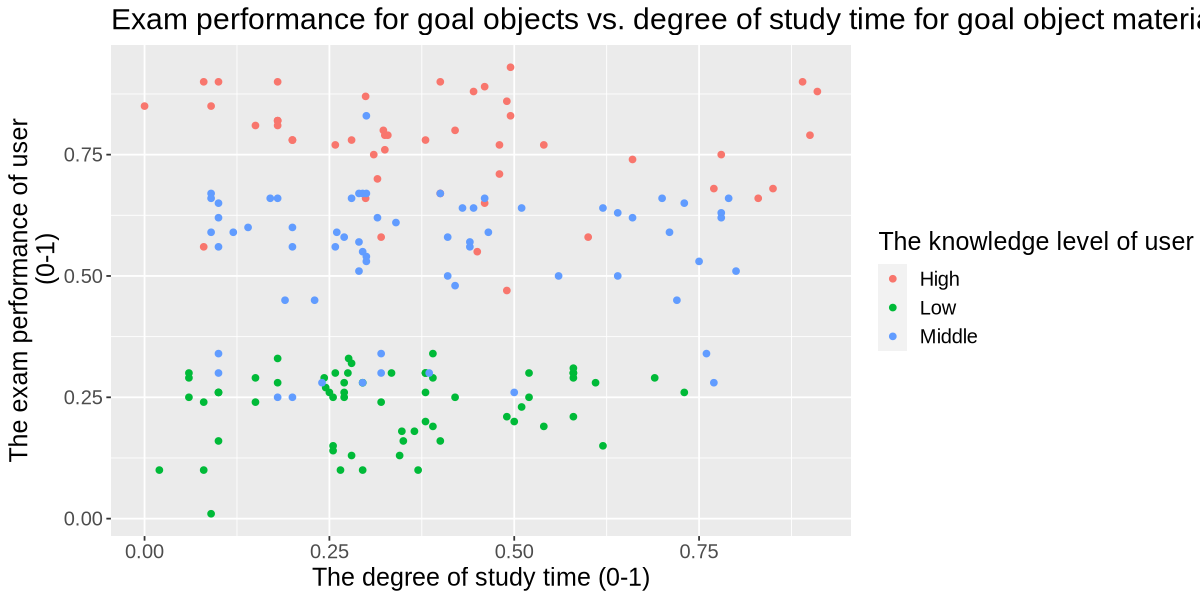

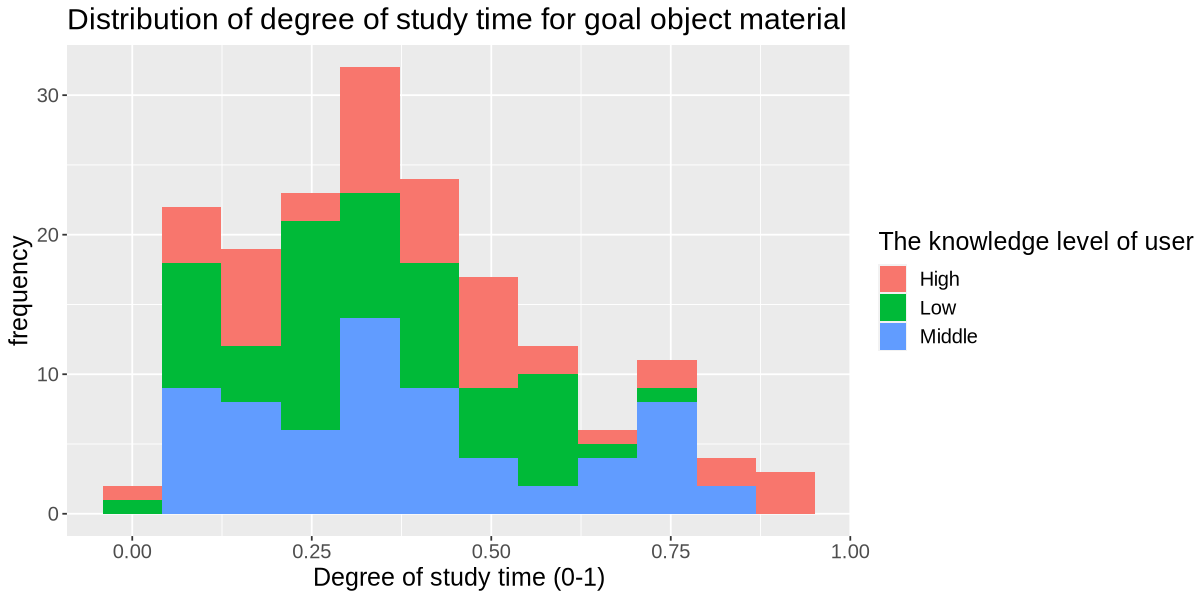

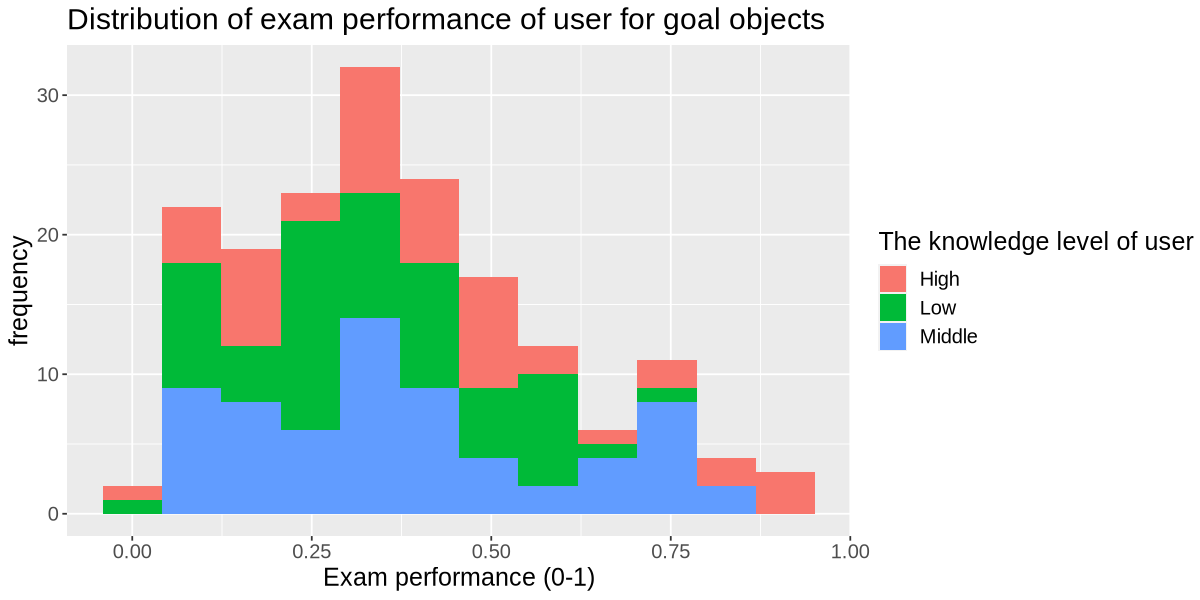

In [76]:
options(repr.plot.height = 5, repr.plot.width = 10)
relation_plot <- knowledge_train |>
    ggplot(aes(x=STG, y=PEG, color=UNS)) +
    geom_point() +
    ggtitle("Exam performance for goal objects vs. degree of study time for goal object material") +
    labs(x="The degree of study time (0-1)", y="The exam performance of user
         (0-1)", color="The knowledge level of user") +
    theme(text=element_text(size=15))

prime_plot <- knowledge_train |> 
    ggplot(aes(fill=UNS)) + labs(fill="The knowledge level of user") + theme(text=element_text(size=15))

STG_distribution <- prime_plot +
    geom_histogram(aes(x=STG), bins=12) +
    ggtitle("Distribution of degree of study time for goal object material") +
    labs(x="Degree of study time (0-1)", y="frequency")

PEG_distribution <- prime_plot +
    geom_histogram(aes(x=STG), bins=12) +
    ggtitle("Distribution of exam performance of user for goal objects") +
    labs(x="Exam performance (0-1)", y="frequency")

relation_plot
STG_distribution
PEG_distribution

# Methods:
For the data analysis, we will use k-nn classification engine to predict knowledge level based on exam performance and degree of study time. We will primarily split the data into training and testing sets using a 75/25 split. For the model, the recipe will take STG and PEG as predictors and predict the knowledge level. Additionally, the training data will be centered and standardized for balanced classification. Furthermore, we will use the vfold function and tune() in our workflow to find the best k value for accuracy to use by plotting the accuracy vs. k value. Then, we will input the best k value into the model, fit our data into the model, and predict test data using the model.  

# Expected outcomes and significance:
We expect to find which specific value for both “weight of players” and “intensity of training” will frequently cause the most injury. These outcomes can allow the players to participate in the game with caution as much as possible, especially those who fall into the data outcomes and play competitive sports. For example, if we get the result that less than 70 kg has a higher chance of having injuries, players might want to fit in the range of weight that has less injury rate. Moreover, we might want to reduce the training time for players to prevent severe injuries caused by sports or by setting the maximum training time per day based on the predictions we made with the results. Not only can we anticipate further injuries which is a major problem that is not avoidable for sports players. Since these outcomes are general, it is possible to analyze and lead to the prevention of further injury in detail for specific sports such as jiu-jitsu, badminton, etc by setting regulations or matching players based on their weight, height, and more to prevent injury realistically for each distinct sport. In addition, we could also predict the number of first-aid helpers needed to aid players by the outcomes.


# References:
Kahraman,Hamdi, Colak,Ilhami, and Sagiroglu,Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data. Knowledge-Based Systems, 37, 283–295. https://doi.org/10.1016/j.knosys.2012.08.00991337